In [36]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','no-latex','grid'])
V=np.loadtxt('realdata.dat',unpack=True) #make a file (.txt works as well) and put all your data in 1 long column
V1=np.loadtxt('data100.dat',unpack=True) # 100 obs

#### 1. Probability Distribution (500 Observations - 50 bins)

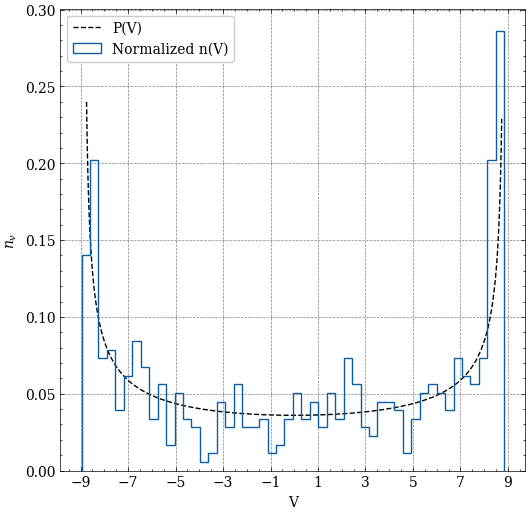

In [37]:
V0=max(V)  #max voltage


plt.figure(figsize=(6,6))
x = np.arange(-V0+0.1, V0-0.1, 0.01)
plt.plot(x,(1/(np.pi*np.sqrt(V0**2-x**2))),color='black',linestyle='--',label='P(V)')
plt.hist(V,bins=50,label='Normalized n(V)',density=True,histtype='step',linestyle='-')
plt.xticks(np.arange(-9,10,2))
plt.xlabel('V')
plt.ylabel('$n_v$')
plt.legend(loc='upper left')
plt.savefig('VvsN(500 obs, bin=50).png',dpi=200)
plt.show()


#### 2. Probability Distribution (500 Observations - 25 bins)

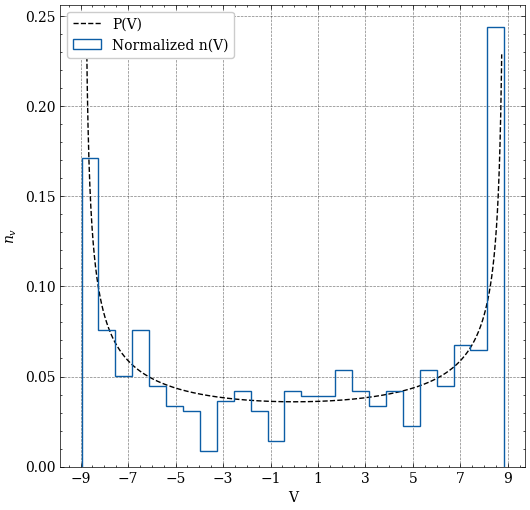

In [38]:
V0=max(V)  #max voltage


plt.figure(figsize=(6,6))
x = np.arange(-V0+0.1, V0-0.1, 0.01)
plt.plot(x,(1/(np.pi*np.sqrt(V0**2-x**2))),color='black',linestyle='--',label='P(V)')
plt.hist(V,bins=25,label='Normalized n(V)',density=True,histtype='step',linestyle='-')
plt.xticks(np.arange(-9,10,2))
plt.xlabel('V')
plt.ylabel('$n_v$')
plt.legend(loc='upper left')
plt.savefig('VvsN(500 obs, bin=25).png',dpi=200) # changed bin size
plt.show()


#### 3. Probability Distribution (100 Observations - 50 bins)

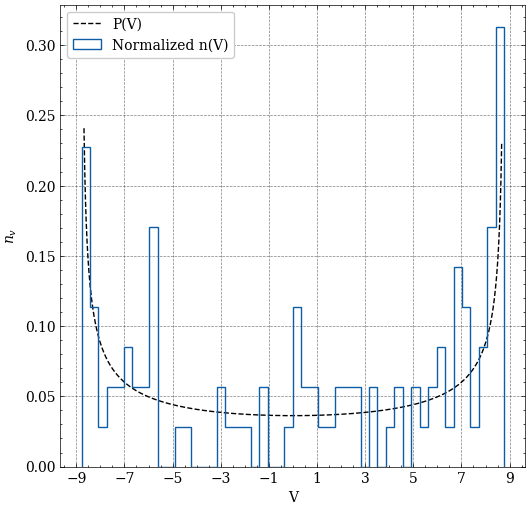

In [39]:
V0=max(V1)  #max voltage


plt.figure(figsize=(6,6))
x = np.arange(-V0+0.1, V0-0.1, 0.01)
plt.plot(x,(1/(np.pi*np.sqrt(V0**2-x**2))),color='black',linestyle='--',label='P(V)')
plt.hist(V1,bins=50,label='Normalized n(V)',density=True,histtype='step',linestyle='-')
plt.xticks(np.arange(-9,10,2))
plt.xlabel('V')
plt.ylabel('$n_v$')
plt.legend(loc='upper left')
plt.savefig('VvsN(100 obs, bin=50).png',dpi=200)
plt.show()


#### 4. Probability Distribution (500 Observations - 25 bins)

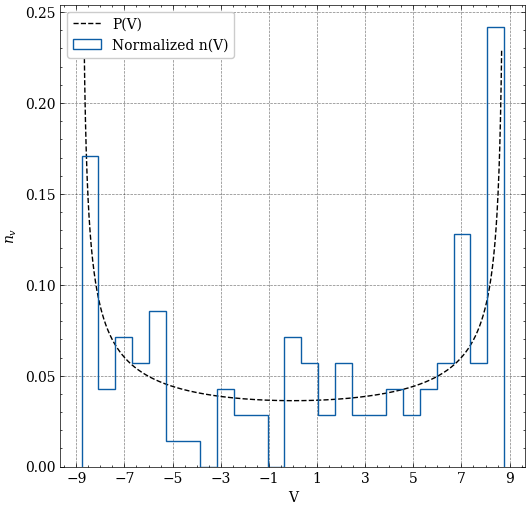

In [40]:
V0=max(V1)  #max voltage


plt.figure(figsize=(6,6))
x = np.arange(-V0+0.1, V0-0.1, 0.01)
plt.plot(x,(1/(np.pi*np.sqrt(V0**2-x**2))),color='black',linestyle='--',label='P(V)')
plt.hist(V1,bins=25,label='Normalized n(V)',density=True,histtype='step',linestyle='-')
plt.xticks(np.arange(-9,10,2))
plt.xlabel('V')
plt.ylabel('$n_v$')
plt.legend(loc='upper left')
plt.savefig('VvsN(100 obs, bin=25).png',dpi=200)
plt.show()


#### 4. Frequency Distribution (500 Observations)

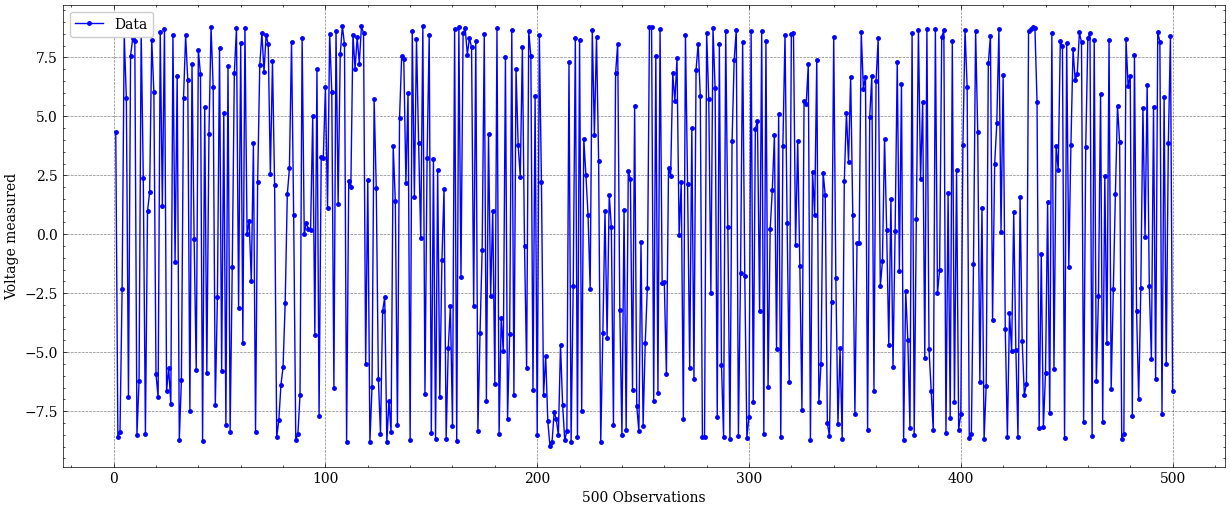

In [41]:
V0=max(V)  #max voltage


plt.figure(figsize=(15,6))
x = np.arange(1,len(V)+1,1)
plt.plot(x,V,'b.-',ms=5,label='Data')
#plt.xticks(np.arange(-9,10,2))
plt.xlabel('500 Observations')
plt.ylabel('Voltage measured')
plt.legend(loc='upper left')
plt.savefig('VvsN(freq dist, 500 obs).png',dpi=200)
plt.show()


#### 4. Frequency Distribution (100 Observations)

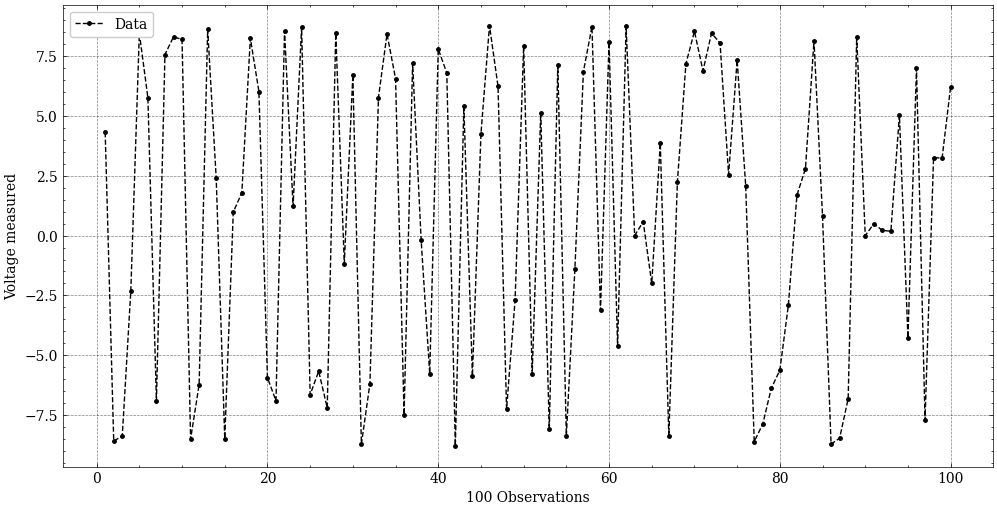

In [42]:
V0=max(V1)  #max voltage


plt.figure(figsize=(12,6))
x = range(1,len(V1)+1,1)
plt.plot(x,V1,'k.--',ms=5,label='Data')
#plt.xticks(np.arange(-9,10,2))
plt.xlabel('100 Observations')
plt.ylabel('Voltage measured')
plt.legend(loc='upper left')
plt.savefig('VvsN(freq dist, 100 obs).png',dpi=200)
plt.show()


In [43]:
ru=[]
for i in V:
    if i not in ru:
        ru.append(i)
print(len(ru)) # no. of unique values in the data

406


#### . Reconstructed Waveform

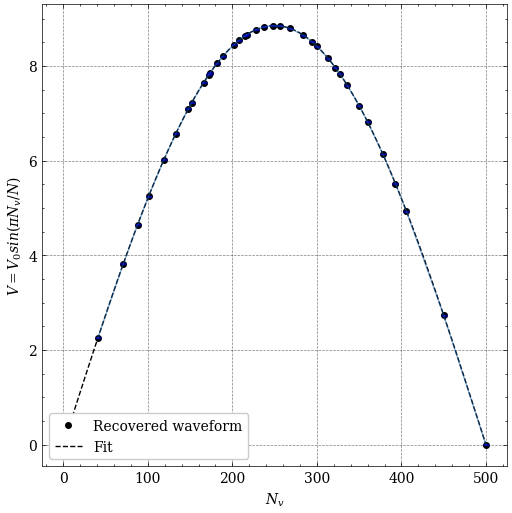

In [44]:
# REconstructed sine wave
V=np.loadtxt('realdata.dat',unpack=True)
V=list(V) # for 500 observations

frac=[i/10 for i in range(-85,95,5)]
Nv=[]
for i in range(-85,95,5):
    c=0
    for j in ru:
        if -9<=j and j<=i/10:
            c+=V.count(j)
    Nv.append(c)

plt.figure(figsize=(6,6))
Vs=[]
for i in Nv:
    Vs.append(max(V)*np.sin(np.pi*i/500))
plt.plot(Nv,Vs,'ko',markersize=4,label='Recovered waveform')

x2 = np.arange(0, 500, 0.1)
y2 = max(V)*np.sin(np.pi*x2/500)
def f(x,a,b):
    return a*np.sin(np.pi*x/500)+b
popt,pcov=curve_fit(f,Nv,Vs)
xFit=np.arange(0,500,0.1)

plt.plot(xFit,f(xFit,*popt),'k--',label='Fit')
plt.errorbar(Nv,Vs,yerr=0.01,ecolor='blue',alpha=0.5,capsize=2)
#plt.plot(x2,y2,'b--',label='$V=V_0sin(\pi x/500)$')
plt.ylabel('$V=V_0sin(\pi N_v/N)$')
plt.xlabel('$N_v$')
plt.legend(loc='lower left')
plt.savefig('VsinvsN.png',dpi=200)
plt.show()